# Dataset Preparation


In [1]:
import os
import zipfile
import random
import shutil
import numpy as np
from shutil import copyfile

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import tensorflow as tf
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
print(tf.__version__)

2.12.0


In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tiffanq","key":"3de5bf5f2966cf71e5d73ad9e3d966fc"}'}

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

100% 3.58G/3.58G [00:36<00:00, 131MB/s]
100% 3.58G/3.58G [00:36<00:00, 104MB/s]


In [8]:
!kaggle datasets download -d raghavrpotdar/fresh-and-stale-images-of-fruits-and-vegetables

100% 1.40G/1.41G [00:26<00:00, 26.9MB/s]
100% 1.41G/1.41G [00:26<00:00, 56.7MB/s]


In [9]:
local_zip = '/content/fresh-and-stale-images-of-fruits-and-vegetables.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [10]:
!kaggle datasets download -d muhriddinmuxiddinov/fruits-and-vegetables-dataset

 99% 864M/870M [00:11<00:00, 62.6MB/s]
100% 870M/870M [00:11<00:00, 78.6MB/s]


In [11]:
local_zip = '/content/fruits-and-vegetables-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Split Data into Train and Test

In [12]:
root_dir = '/content/dataset-fruits-vegetables'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):

  training = 'training'
  testing = 'testing'

  f_apple = 'fresh_apple'
  f_banana = 'fresh_banana'
  f_orange = 'fresh_orange'
  f_tomato = 'fresh_tomato'
  f_cucumber = 'fresh_cucumber'

  r_apple = 'rotten_apple'
  r_banana = 'rotten_banana'
  r_orange = 'rotten_orange'
  r_tomato = 'rotten_tomato'
  r_cucumber = 'rotten_cucumber'

  cats = 'cats'
  dogs = 'dogs'


  # Training and Testing
  path1 = os.path.join(root_dir, training)
  os.makedirs(path1)
  path2 = os.path.join(root_dir, testing)
  os.makedirs(path2)

  # Training for fresh ingredients
  path1_f_apple = os.path.join(path1, f_apple)
  os.makedirs(path1_f_apple)
  path1_f_banana = os.path.join(path1, f_banana)
  os.makedirs(path1_f_banana)
  path1_f_orange = os.path.join(path1, f_orange)
  os.makedirs(path1_f_orange)
  path1_f_tomato = os.path.join(path1, f_tomato)
  os.makedirs(path1_f_tomato)
  path1_f_cucumber = os.path.join(path1, f_cucumber)
  os.makedirs(path1_f_cucumber)

  # Training for rotten ingredients
  path1_r_apple = os.path.join(path1, r_apple)
  os.makedirs(path1_r_apple)
  path1_r_banana = os.path.join(path1, r_banana)
  os.makedirs(path1_r_banana)
  path1_r_orange = os.path.join(path1, r_orange)
  os.makedirs(path1_r_orange)
  path1_r_tomato = os.path.join(path1, r_tomato)
  os.makedirs(path1_r_tomato)
  path1_r_cucumber = os.path.join(path1, r_cucumber)
  os.makedirs(path1_r_cucumber)

  # Testing for fresh ingredients
  path2_f_apple = os.path.join(path2, f_apple)
  os.makedirs(path2_f_apple)
  path2_f_banana = os.path.join(path2, f_banana)
  os.makedirs(path2_f_banana)
  path2_f_orange = os.path.join(path2, f_orange)
  os.makedirs(path2_f_orange)
  path2_f_tomato = os.path.join(path2, f_tomato)
  os.makedirs(path2_f_tomato)
  path2_f_cucumber = os.path.join(path2, f_cucumber)
  os.makedirs(path2_f_cucumber)

  # Testing for rotten ingredients
  path2_r_apple = os.path.join(path2, r_apple)
  os.makedirs(path2_r_apple)
  path2_r_banana = os.path.join(path2, r_banana)
  os.makedirs(path2_r_banana)
  path2_r_orange = os.path.join(path2, r_orange)
  os.makedirs(path2_r_orange)
  path2_r_tomato = os.path.join(path2, r_tomato)
  os.makedirs(path2_r_tomato)
  path2_r_cucumber = os.path.join(path2, r_cucumber)
  os.makedirs(path2_r_cucumber)

  
try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [13]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/dataset-fruits-vegetables/training
/content/dataset-fruits-vegetables/testing
/content/dataset-fruits-vegetables/training/rotten_banana
/content/dataset-fruits-vegetables/training/rotten_tomato
/content/dataset-fruits-vegetables/training/fresh_cucumber
/content/dataset-fruits-vegetables/training/fresh_tomato
/content/dataset-fruits-vegetables/training/fresh_apple
/content/dataset-fruits-vegetables/training/fresh_orange
/content/dataset-fruits-vegetables/training/rotten_cucumber
/content/dataset-fruits-vegetables/training/fresh_banana
/content/dataset-fruits-vegetables/training/rotten_apple
/content/dataset-fruits-vegetables/training/rotten_orange
/content/dataset-fruits-vegetables/testing/rotten_banana
/content/dataset-fruits-vegetables/testing/rotten_tomato
/content/dataset-fruits-vegetables/testing/fresh_cucumber
/content/dataset-fruits-vegetables/testing/fresh_tomato
/content/dataset-fruits-vegetables/testing/fresh_apple
/content/dataset-fruits-vegetables/testing/fresh_oran

In [14]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  
  temp_list = []
  for image in os.listdir(SOURCE_DIR):
    file_name = os.path.join(SOURCE_DIR, image)
    if os.path.getsize(file_name) > 0:
      temp_list.append(image)
    else:
      print("{} is zero length, so ignoring.".format(image))

  train_total = int(len(temp_list)*SPLIT_SIZE)
  #validation_total = len(temp_list) - train_total
  shuffled_list = random.sample(temp_list, len(temp_list))
  train_list = shuffled_list[0:train_total]
  validation_list = shuffled_list[train_total:len(temp_list)]

  for t in train_list:
    path = os.path.join(SOURCE_DIR, t)
    path1 = os.path.join(TRAINING_DIR, t)
    copyfile(path, path1)

  for v in validation_list:
    path = os.path.join(SOURCE_DIR, v)
    path1 = os.path.join(VALIDATION_DIR, v)
    copyfile(path, path1)


In [15]:
#### FRESH INGREDIENTS

# Define paths
F_APPLE_SOURCE_DIR = "/content/fresh_apple"
F_BANANA_SOURCE_DIR = "/content/fresh_banana"
F_ORANGE_SOURCE_DIR = "/content/fresh_orange"
F_TOMATO_SOURCE_DIR = "/content/fresh_tomato"
F_CUCUMBER_SOURCE_DIR = "/content/Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCucumber"


TRAINING_DIR = "/content/dataset-fruits-vegetables/training"
VALIDATION_DIR = "/content/dataset-fruits-vegetables/testing"

TRAINING_F_APPLE_DIR = os.path.join(TRAINING_DIR, "fresh_apple/")
VALIDATION_F_APPLE_DIR = os.path.join(VALIDATION_DIR, "fresh_apple/")

TRAINING_F_BANANA_DIR = os.path.join(TRAINING_DIR, "fresh_banana/")
VALIDATION_F_BANANA_DIR = os.path.join(VALIDATION_DIR, "fresh_banana/")

TRAINING_F_ORANGE_DIR = os.path.join(TRAINING_DIR, "fresh_orange/")
VALIDATION_F_ORANGE_DIR = os.path.join(VALIDATION_DIR, "fresh_orange/")

TRAINING_F_TOMATO_DIR = os.path.join(TRAINING_DIR, "fresh_tomato/")
VALIDATION_F_TOMATO_DIR = os.path.join(VALIDATION_DIR, "fresh_tomato/")

TRAINING_F_CUCUMBER_DIR = os.path.join(TRAINING_DIR, "fresh_cucumber/")
VALIDATION_F_CUCUMBER_DIR = os.path.join(VALIDATION_DIR, "fresh_cucumber/")


# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_F_APPLE_DIR)) > 0:
  for file in os.scandir(TRAINING_F_APPLE_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_F_BANANA_DIR)) > 0:
  for file in os.scandir(TRAINING_F_BANANA_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_F_ORANGE_DIR)) > 0:
  for file in os.scandir(TRAINING_F_ORANGE_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_F_CUCUMBER_DIR)) > 0:
  for file in os.scandir(TRAINING_F_CUCUMBER_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_F_TOMATO_DIR)) > 0:
  for file in os.scandir(TRAINING_F_TOMATO_DIR):
    os.remove(file.path)

if len(os.listdir(VALIDATION_F_APPLE_DIR )) > 0:
  for file in os.scandir(VALIDATION_F_APPLE_DIR ):
    os.remove(file.path)
if len(os.listdir(VALIDATION_F_BANANA_DIR)) > 0:
  for file in os.scandir(VALIDATION_F_BANANA_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_F_ORANGE_DIR)) > 0:
  for file in os.scandir(VALIDATION_F_ORANGE_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_F_CUCUMBER_DIR)) > 0:
  for file in os.scandir(VALIDATION_F_CUCUMBER_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_F_TOMATO_DIR)) > 0:
  for file in os.scandir(VALIDATION_F_TOMATO_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .8

split_data(F_APPLE_SOURCE_DIR, TRAINING_F_APPLE_DIR, VALIDATION_F_APPLE_DIR, split_size)
split_data(F_BANANA_SOURCE_DIR, TRAINING_F_BANANA_DIR, VALIDATION_F_BANANA_DIR, split_size)
split_data(F_ORANGE_SOURCE_DIR, TRAINING_F_ORANGE_DIR, VALIDATION_F_ORANGE_DIR, split_size)
split_data(F_TOMATO_SOURCE_DIR, TRAINING_F_TOMATO_DIR, VALIDATION_F_TOMATO_DIR, split_size)
split_data(F_CUCUMBER_SOURCE_DIR, TRAINING_F_CUCUMBER_DIR, VALIDATION_F_CUCUMBER_DIR, split_size)

print(f"\n\nOriginal apple's directory has {len(os.listdir(F_APPLE_SOURCE_DIR))} images")
print(f"Original banana's directory has {len(os.listdir(F_BANANA_SOURCE_DIR))} images\n")
print(f"\n\nOriginal orange's directory has {len(os.listdir(F_ORANGE_SOURCE_DIR))} images")
print(f"Original tomato's directory has {len(os.listdir(F_TOMATO_SOURCE_DIR))} images\n")
print(f"\n\nOriginal cucumber's directory has {len(os.listdir(F_CUCUMBER_SOURCE_DIR))} images")

print(f"There are {len(os.listdir(TRAINING_F_APPLE_DIR))} images of apple for training")
print(f"There are {len(os.listdir(TRAINING_F_BANANA_DIR))} images of banana for training")
print(f"There are {len(os.listdir(TRAINING_F_ORANGE_DIR))} images of orange for training")
print(f"There are {len(os.listdir(TRAINING_F_TOMATO_DIR))} images of tomato for training")
print(f"There are {len(os.listdir(TRAINING_F_CUCUMBER_DIR))} images of cucumber for training")


print(f"There are {len(os.listdir(VALIDATION_F_APPLE_DIR))} images of apples for validation")
print(f"There are {len(os.listdir(VALIDATION_F_BANANA_DIR))} images of banana for validation")
print(f"There are {len(os.listdir(VALIDATION_F_ORANGE_DIR))} images of oranges for validation")
print(f"There are {len(os.listdir(VALIDATION_F_TOMATO_DIR))} images of tomato for validation")
print(f"There are {len(os.listdir(VALIDATION_F_CUCUMBER_DIR))} images of cucumber for validation")



Original apple's directory has 1693 images
Original banana's directory has 1581 images



Original orange's directory has 1466 images
Original tomato's directory has 981 images



Original cucumber's directory has 608 images
There are 1354 images of apple for training
There are 1264 images of banana for training
There are 1172 images of orange for training
There are 784 images of tomato for training
There are 486 images of cucumber for training
There are 339 images of apples for validation
There are 317 images of banana for validation
There are 294 images of oranges for validation
There are 197 images of tomato for validation
There are 122 images of cucumber for validation


In [16]:
#### ROTTEN INGREDIENTS

# Define paths
R_APPLE_SOURCE_DIR = "/content/stale_apple"
R_BANANA_SOURCE_DIR = "/content/stale_banana"
R_ORANGE_SOURCE_DIR = "/content/stale_orange"
R_TOMATO_SOURCE_DIR = "/content/stale_tomato"
R_CUCUMBER_SOURCE_DIR = "/content/Fruits_Vegetables_Dataset(12000)/Vegetables/RottenCucumber"


#TRAINING_DIR = "/content/dataset-fruits-vegetables/training"
#VALIDATION_DIR = "/content/dataset-fruits-vegetables/testing"

TRAINING_R_APPLE_DIR = os.path.join(TRAINING_DIR, "rotten_apple/")
VALIDATION_R_APPLE_DIR = os.path.join(VALIDATION_DIR, "rotten_apple/")

TRAINING_R_BANANA_DIR = os.path.join(TRAINING_DIR, "rotten_banana/")
VALIDATION_R_BANANA_DIR = os.path.join(VALIDATION_DIR, "rotten_banana/")

TRAINING_R_ORANGE_DIR = os.path.join(TRAINING_DIR, "rotten_orange/")
VALIDATION_R_ORANGE_DIR = os.path.join(VALIDATION_DIR, "rotten_orange/")

TRAINING_R_TOMATO_DIR = os.path.join(TRAINING_DIR, "rotten_tomato/")
VALIDATION_R_TOMATO_DIR = os.path.join(VALIDATION_DIR, "rotten_tomato/")

TRAINING_R_CUCUMBER_DIR = os.path.join(TRAINING_DIR, "rotten_cucumber/")
VALIDATION_R_CUCUMBER_DIR = os.path.join(VALIDATION_DIR, "rotten_cucumber/")


# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_R_APPLE_DIR)) > 0:
  for file in os.scandir(TRAINING_R_APPLE_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_R_BANANA_DIR)) > 0:
  for file in os.scandir(TRAINING_R_BANANA_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_R_ORANGE_DIR)) > 0:
  for file in os.scandir(TRAINING_R_ORANGE_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_R_CUCUMBER_DIR)) > 0:
  for file in os.scandir(TRAINING_R_CUCUMBER_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_R_TOMATO_DIR)) > 0:
  for file in os.scandir(TRAINING_R_TOMATO_DIR):
    os.remove(file.path)

if len(os.listdir(VALIDATION_R_APPLE_DIR )) > 0:
  for file in os.scandir(VALIDATION_R_APPLE_DIR ):
    os.remove(file.path)
if len(os.listdir(VALIDATION_R_BANANA_DIR)) > 0:
  for file in os.scandir(VALIDATION_R_BANANA_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_R_ORANGE_DIR)) > 0:
  for file in os.scandir(VALIDATION_R_ORANGE_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_R_CUCUMBER_DIR)) > 0:
  for file in os.scandir(VALIDATION_R_CUCUMBER_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_R_TOMATO_DIR)) > 0:
  for file in os.scandir(VALIDATION_R_TOMATO_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .8

split_data(R_APPLE_SOURCE_DIR, TRAINING_R_APPLE_DIR, VALIDATION_R_APPLE_DIR, split_size)
split_data(R_BANANA_SOURCE_DIR, TRAINING_R_BANANA_DIR, VALIDATION_R_BANANA_DIR, split_size)
split_data(R_ORANGE_SOURCE_DIR, TRAINING_R_ORANGE_DIR, VALIDATION_R_ORANGE_DIR, split_size)
split_data(R_TOMATO_SOURCE_DIR, TRAINING_R_TOMATO_DIR, VALIDATION_R_TOMATO_DIR, split_size)
split_data(R_CUCUMBER_SOURCE_DIR, TRAINING_R_CUCUMBER_DIR, VALIDATION_R_CUCUMBER_DIR, split_size)

print(f"\n\nOriginal apple's directory has {len(os.listdir(R_APPLE_SOURCE_DIR))} images")
print(f"Original banana's directory has {len(os.listdir(R_BANANA_SOURCE_DIR))} images\n")
print(f"\n\nOriginal orange's directory has {len(os.listdir(R_ORANGE_SOURCE_DIR))} images")
print(f"Original tomato's directory has {len(os.listdir(R_TOMATO_SOURCE_DIR))} images\n")
print(f"\n\nOriginal cucumber's directory has {len(os.listdir(R_CUCUMBER_SOURCE_DIR))} images")

print(f"There are {len(os.listdir(TRAINING_R_APPLE_DIR))} images of apple for training")
print(f"There are {len(os.listdir(TRAINING_R_BANANA_DIR))} images of banana for training")
print(f"There are {len(os.listdir(TRAINING_R_ORANGE_DIR))} images of orange for training")
print(f"There are {len(os.listdir(TRAINING_R_TOMATO_DIR))} images of tomato for training")
print(f"There are {len(os.listdir(TRAINING_R_CUCUMBER_DIR))} images of cucumber for training")


print(f"There are {len(os.listdir(VALIDATION_R_APPLE_DIR))} images of apples for validation")
print(f"There are {len(os.listdir(VALIDATION_R_BANANA_DIR))} images of banana for validation")
print(f"There are {len(os.listdir(VALIDATION_R_ORANGE_DIR))} images of oranges for validation")
print(f"There are {len(os.listdir(VALIDATION_R_TOMATO_DIR))} images of tomato for validation")
print(f"There are {len(os.listdir(VALIDATION_R_CUCUMBER_DIR))} images of cucumber for validation")



Original apple's directory has 2342 images
Original banana's directory has 1467 images



Original orange's directory has 1595 images
Original tomato's directory has 982 images



Original cucumber's directory has 593 images
There are 1873 images of apple for training
There are 1173 images of banana for training
There are 1276 images of orange for training
There are 785 images of tomato for training
There are 474 images of cucumber for training
There are 469 images of apples for validation
There are 294 images of banana for validation
There are 319 images of oranges for validation
There are 197 images of tomato for validation
There are 119 images of cucumber for validation


In [17]:
labels = []
for label in os.listdir('/content/dataset-fruits-vegetables/training/'):
  labels.append(label)

NUM_LABELS = len(labels)
print(NUM_LABELS)
print(labels)

10
['rotten_banana', 'rotten_tomato', 'fresh_cucumber', 'fresh_tomato', 'fresh_apple', 'fresh_orange', 'rotten_cucumber', 'fresh_banana', 'rotten_apple', 'rotten_orange']


# Augmentation

In [18]:
train_datagen = ImageDataGenerator(rescale=1.0/255.,
                                     rotation_range=0.2,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size = 32,
                                                      shuffle = True,
                                                      classes = labels,
                                                      class_mode='categorical',
                                                      target_size=(150,150))

validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=1,
                                                                classes=labels,
                                                                class_mode='categorical',
                                                                target_size=(150,150))

Found 10641 images belonging to 10 classes.
Found 2667 images belonging to 10 classes.


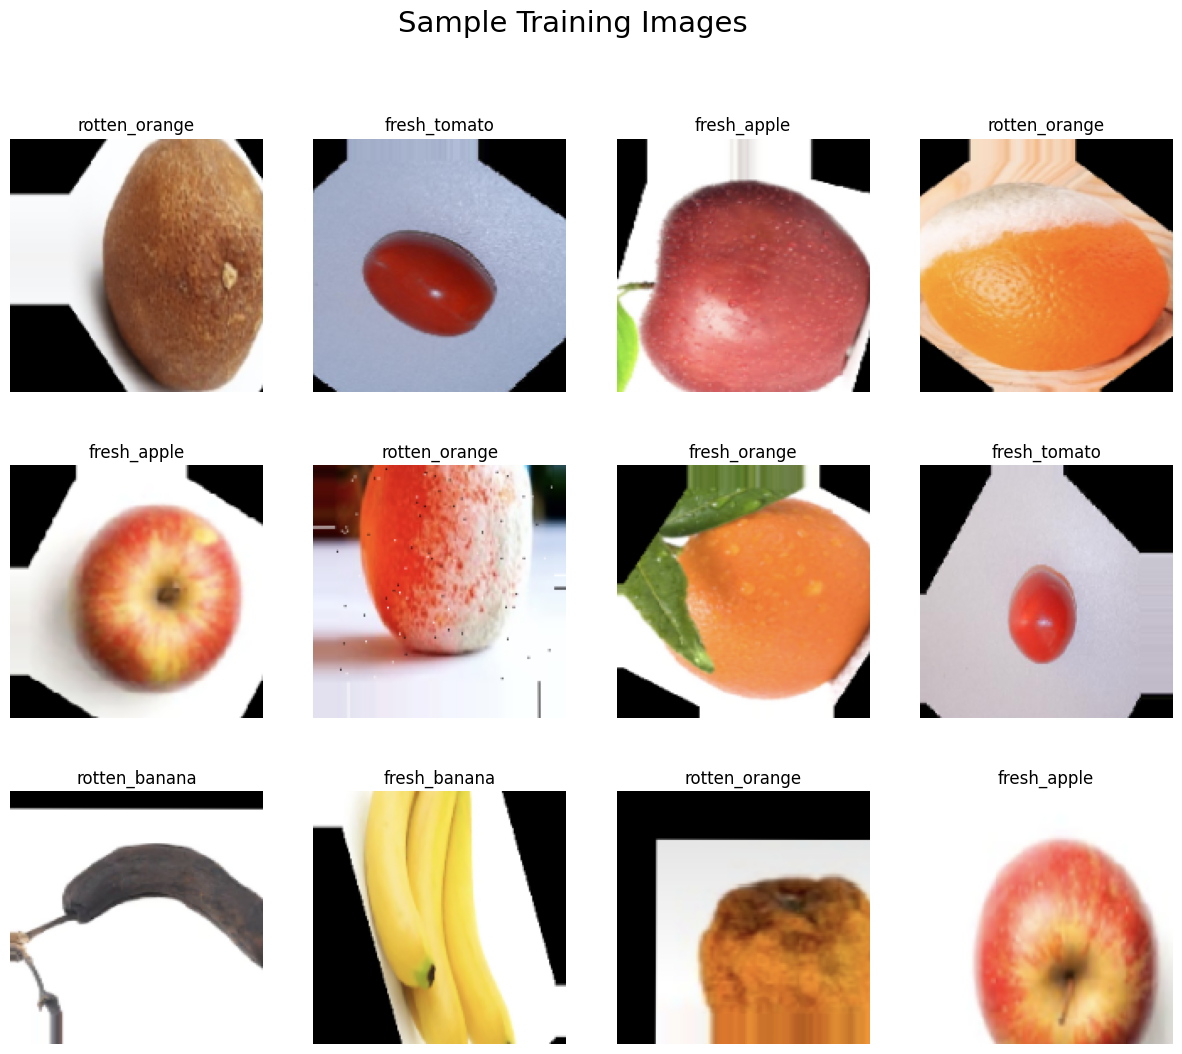

In [19]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
idx = 0

for i in range(3):
    for j in range(4):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i,j].set_title(f"{label}")
        ax[i,j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i,j].axis("off")
        idx += 1

# plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()
     

# Train Model

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [21]:
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy']) 

In [22]:
## Transfer Learning
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
import pandas as pd

pre_trained_model = InceptionV3(input_shape=(150,150,3),
                                include_top=False)

for layer in pre_trained_model.layers:
    layer.trainable = False

x = layers.Flatten()(pre_trained_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(10, activation='softmax')(x)

model = Model(pre_trained_model.input, x) 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

87910968/87910968 [==============================] - 1s 0us/step


In [23]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_3[0][0]']               
 alization)                                                                                       
                                                                                              

In [24]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.9):
      print("\n90% accuracy. Stop Training")
      self.model.stop_training = True

callbacks = myCallback()

In [63]:
history = model.fit(train_generator,
                    epochs=3,
                    verbose=1,
                    )

Epoch 1/3
333/333 [==============================] - 753s 2s/step - loss: 0.1817 - accuracy: 0.9426
Epoch 2/3
333/333 [==============================] - 740s 2s/step - loss: 0.1865 - accuracy: 0.9421
Epoch 3/3
333/333 [==============================] - 757s 2s/step - loss: 0.1686 - accuracy: 0.9471


<Figure size 640x480 with 0 Axes>

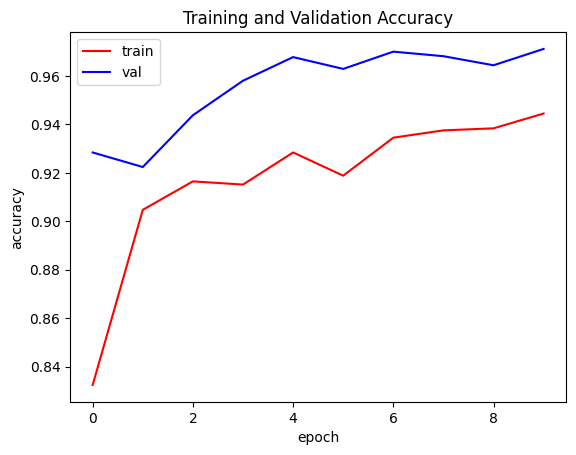

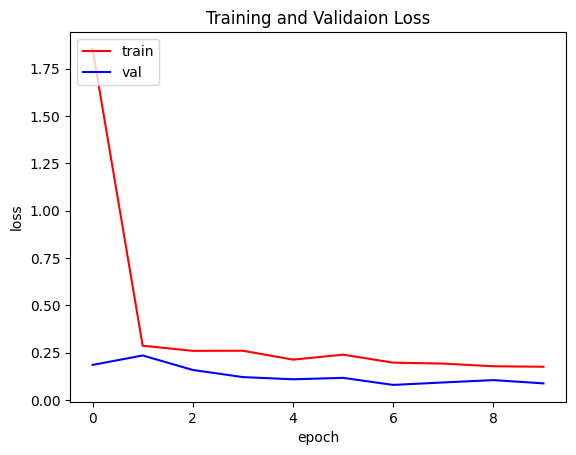

<Figure size 640x480 with 0 Axes>

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

In [64]:
val_loss, val_acc = model.evaluate(validation_generator, verbose=1)

print('\nValidation accuracy:', val_acc)

2667/2667 [==============================] - 248s 93ms/step - loss: 0.1076 - accuracy: 0.9715

Validation accuracy: 0.9715035557746887


# Predict Images

In [106]:
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))
  
  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  classes = np.argmax(classes,axis=1)

  print(labels[classes[0]])
  
  #print(classes[0])

Saving image (1).png to image (1).png
1/1 [==============================] - 0s 103ms/step
rotten_cucumber
